<a href="https://www.kaggle.com/code/sonaidas/notebookfa87e13c82?scriptVersionId=155686566" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [3]:
data_path = os.getcwd()
train_data_path = data_path + '/kaggle/input/taxi_fare_train.csv'
test_data_path = data_path + '/kaggle/input/taxi_fare_test.csv'

df_train = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows=500_000)
df_test = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                500000 non-null  object 
 1   fare_amount        500000 non-null  float64
 2   pickup_datetime    500000 non-null  object 
 3   pickup_longitude   500000 non-null  float64
 4   pickup_latitude    500000 non-null  float64
 5   dropoff_longitude  499995 non-null  float64
 6   dropoff_latitude   499995 non-null  float64
 7   passenger_count    500000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 30.5+ MB


In [5]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000
mean,11.358361,-72.519958,39.920276,-72.522435,39.916526,1.683428
std,9.916617,11.856831,8.073475,11.797362,7.391002,1.307395
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734917,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [7]:
train_Y = np.array(df_train['fare_amount'])
ids = df_test['key']

df_train = df_train.drop(['key', 'fare_amount'] , axis=1)
df_test = df_test.drop(['key'] , axis=1)
df = pd.concat([df_train,df_test])

df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
df_train['diff_lat'] = (df_train['dropoff_latitude'] - df_train['pickup_latitude']).abs()
df_train['diff_long'] = (df_train['dropoff_longitude'] - df_train['pickup_longitude'] ).abs()

df_test['diff_lat'] = (df_test['dropoff_latitude'] - df_test['pickup_latitude']).abs()
df_test['diff_long'] = (df_test['dropoff_longitude'] - df_test['pickup_longitude'] ).abs()

In [9]:
df_train.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,diff_lat,diff_long
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440


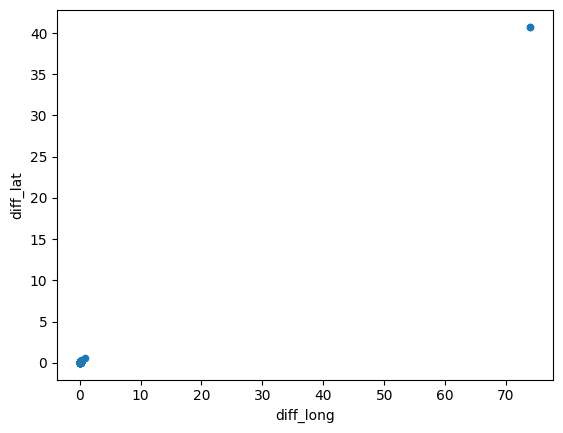

In [10]:
plot = df_train.iloc[:2000].plot.scatter('diff_long', 'diff_lat')

In [11]:
df['distance_2D'] = (
    (df['dropoff_longitude'] - df['pickup_longitude']) ** 2 + \
    (df['dropoff_latitude'] - df['pickup_latitude']) ** 2) ** 0.5


df = df.drop(['pickup_longitude', 
              'pickup_latitude', 
              'dropoff_longitude', 
              'dropoff_latitude', 
              'pickup_datetime'
              ], axis=1)
              
df.head()

,passenger_count,distance_2D
0,1,0.009436
1,1,0.079696
2,2,0.013674
3,1,0.025340
4,1,0.019470


In [12]:
df['passenger_count'] = df['passenger_count'].fillna(-1)
df['distance_2D'] = df['distance_2D'].fillna(-1)

In [13]:
from sklearn import datasets, metrics
from catboost import CatBoostRegressor

In [14]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

reg = CatBoostRegressor()
reg.fit(train_X, train_Y)
pred = reg.predict(test_X)

Learning rate set to 0.109299
0:	learn: 9.2218629	total: 119ms	remaining: 1m 58s
1:	learn: 8.6208562	total: 163ms	remaining: 1m 21s
2:	learn: 8.1116147	total: 201ms	remaining: 1m 6s
3:	learn: 7.6755318	total: 233ms	remaining: 58.1s
4:	learn: 7.3097792	total: 274ms	remaining: 54.5s
5:	learn: 7.0052746	total: 323ms	remaining: 53.5s
6:	learn: 6.7476108	total: 368ms	remaining: 52.2s
7:	learn: 6.5292211	total: 417ms	remaining: 51.7s
8:	learn: 6.3515371	total: 461ms	remaining: 50.7s
9:	learn: 6.2011567	total: 522ms	remaining: 51.7s
10:	learn: 6.0830551	total: 566ms	remaining: 50.9s
11:	learn: 5.9810166	total: 613ms	remaining: 50.5s
12:	learn: 5.8969016	total: 678ms	remaining: 51.5s
13:	learn: 5.8282419	total: 748ms	remaining: 52.7s
14:	learn: 5.7736665	total: 821ms	remaining: 53.9s
15:	learn: 5.7243353	total: 863ms	remaining: 53.1s
16:	learn: 5.6852589	total: 910ms	remaining: 52.6s
17:	learn: 5.6502165	total: 952ms	remaining: 51.9s
18:	learn: 5.6244861	total: 993ms	remaining: 51.3s
19:	learn

In [15]:
pred = np.array(pred)
sub = pd.DataFrame({'key': ids, 'fare_amount': pred})
sub.to_csv('/kaggle/working/submission.csv', index=False) 